In [2]:
import requests
import xml.etree.ElementTree as ET
from eurlex import get_html_by_celex_id


url = "https://eur-lex.europa.eu/EURLexWebService"

headers = {
    "Content-Type": "application/soap+xml;charset=UTF-8",
}
 
payload = """<?xml version=\"1.0\" encoding=\"utf-8\"?>
            <soap:Envelope xmlns:soap="http://www.w3.org/2003/05/soap-envelope" xmlns:sear="http://eur-lex.europa.eu/search">
    <soap:Header>
        <wsse:Security xmlns:wsse="http://docs.oasis-open.org/wss/2004/01/oasis-200401-wss-wssecurity-secext-1.0.xsd" soap:mustUnderstand="true">
            <wsse:UsernameToken xmlns:wsu="http://docs.oasis-open.org/wss/2004/01/oasis-200401-wss-wssecurity-utility-1.0.xsd" wsu:Id="UsernameToken-1">
                <wsse:Username>n00f9vkm</wsse:Username>
                <wsse:Password Type="http://docs.oasis-open.org/wss/2004/01/oasis-200401-wss-username-token-profile-1.0#PasswordText">6EbVqkb6OVX</wsse:Password>
            </wsse:UsernameToken>
        </wsse:Security>
    </soap:Header>
    <soap:Body>
        <sear:searchRequest>
            <sear:expertQuery>
                <![CDATA[Titel ~ 2021/535]]>
            </sear:expertQuery>
            <sear:page>1</sear:page>
            <sear:pageSize>1</sear:pageSize>
            <sear:searchLanguage>en</sear:searchLanguage>
        </sear:searchRequest>
    </soap:Body>
</soap:Envelope>"""

response = requests.request("POST", url, headers=headers, data=payload)

if response.status_code != 200:
    raise Exception("Error accessing EUR-Lex service")
    

namespaces = {
    'soap': 'http://www.w3.org/2003/05/soap-envelope',
    'sear': 'http://eur-lex.europa.eu/search'
}

root = ET.fromstring(response.text)
celex_element = root.find('.//sear:ID_CELEX', namespaces) 

celex_value = celex_element[0].text if celex_element is not None else None

if celex_value is not None:
    html_string = get_html_by_celex_id(celex_value)   
    folder_path = "out/"
    file_name = celex_value + ".html"
    file_path = folder_path + file_name

    with open(file_path, "w") as file:
        file.write(html_string)

    print("HTML file saved successfully at:", file_path)

else:
    print("ID_CELEX tag not found.")


HTML file saved successfully at: out/32021R0535.html


<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE html PUBLIC "-//W3C//DTD XHTML//EN" "xhtml-strict.dtd"><html xmlns="http://www.w3.org/1999/xhtml"><!-- CONVEX # converter_version:9.15.0 # generated_on:20231208-0123 # ELI version:0.10 --><head>
      <meta http-equiv="content-type" content="text/html; charset=utf-8"/>
      <link type="text/css" rel="stylesheet" href="oj-convex.css"/>
      <title>L_2021117EN.01000101.xml</title>
   </head>
   <body>
      <table width="100%" border="0" cellspacing="0" cellpadding="0">
         <col width="10%"/>
         <col width="10%"/>
         <col width="60%"/>
         <col width="20%"/>
         <tbody>
            <tr>
               <td  >
                  <p class="oj-hd-date">6.4.2021   </p>
               </td>
               <td  >
                  <p class="oj-hd-lg">EN</p>
               </td>
               <td  >
                  <p class="oj-hd-ti">Official Journal of the European Union</p>
               </td>
               <td  
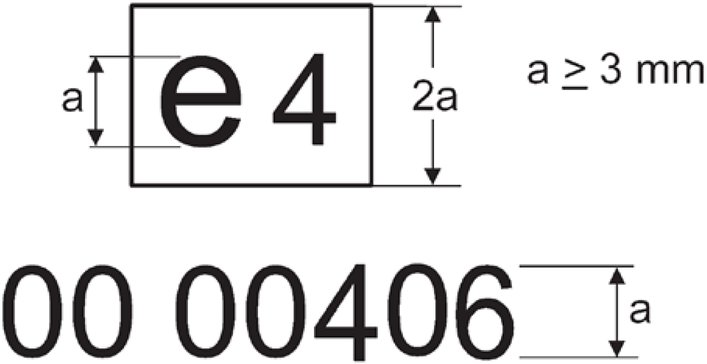
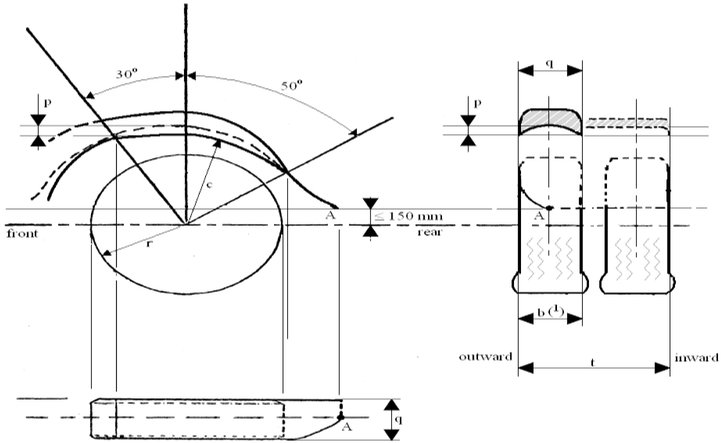
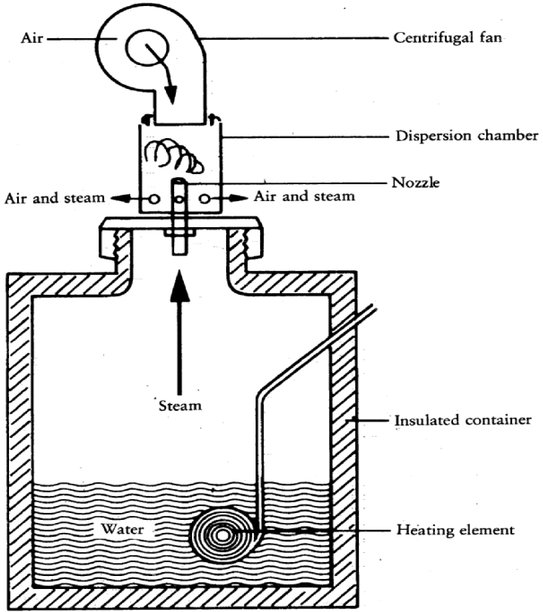
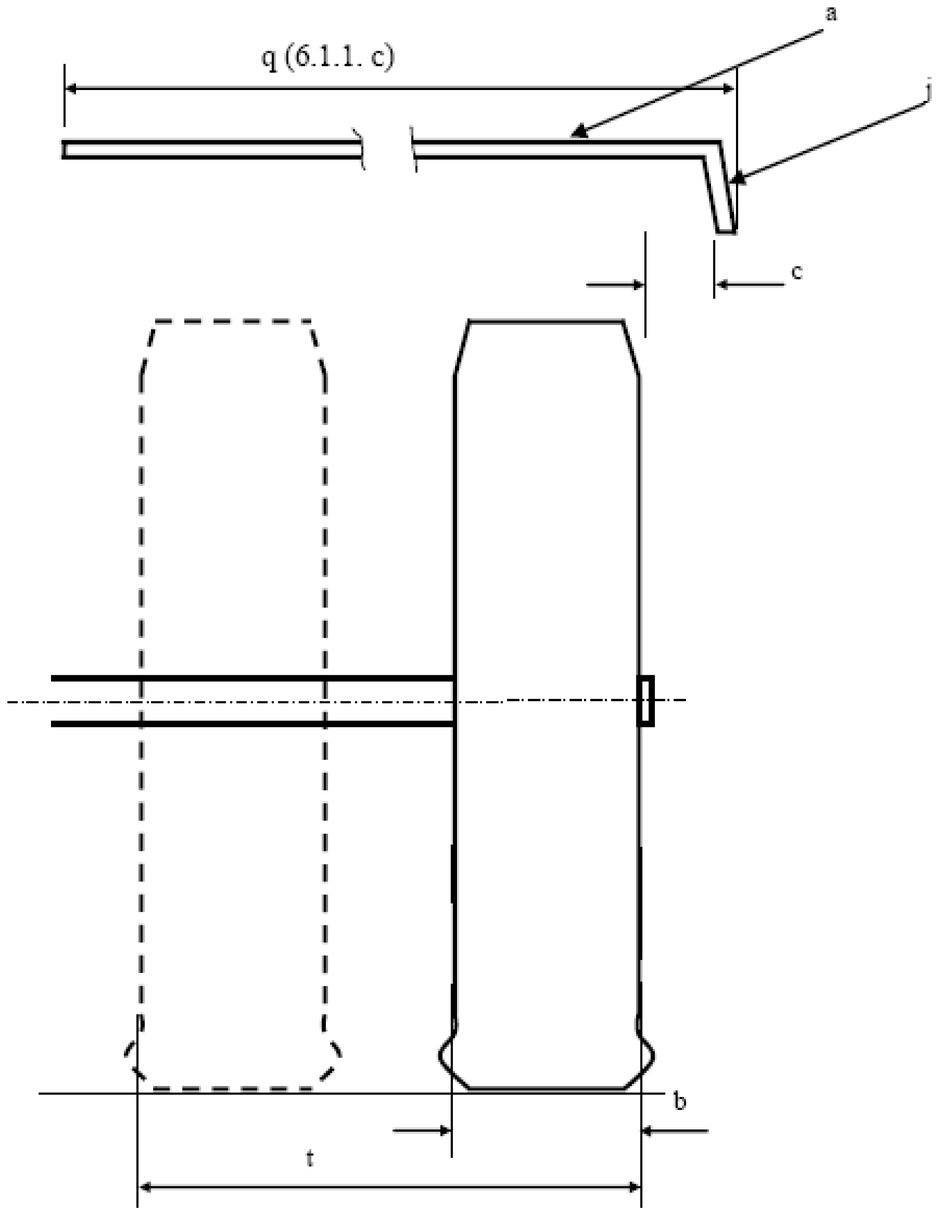
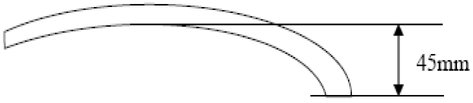
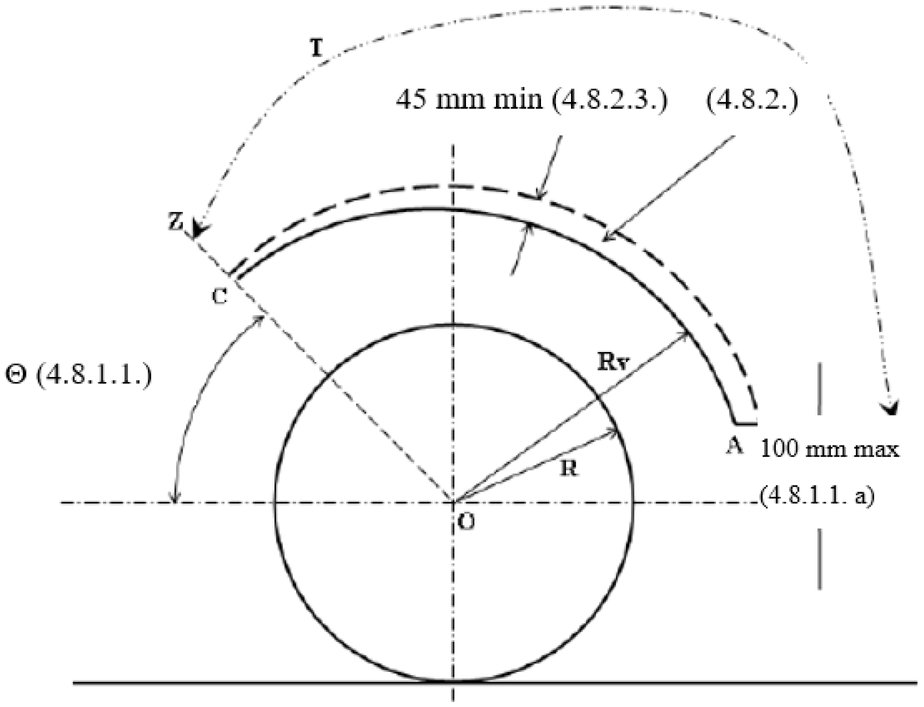
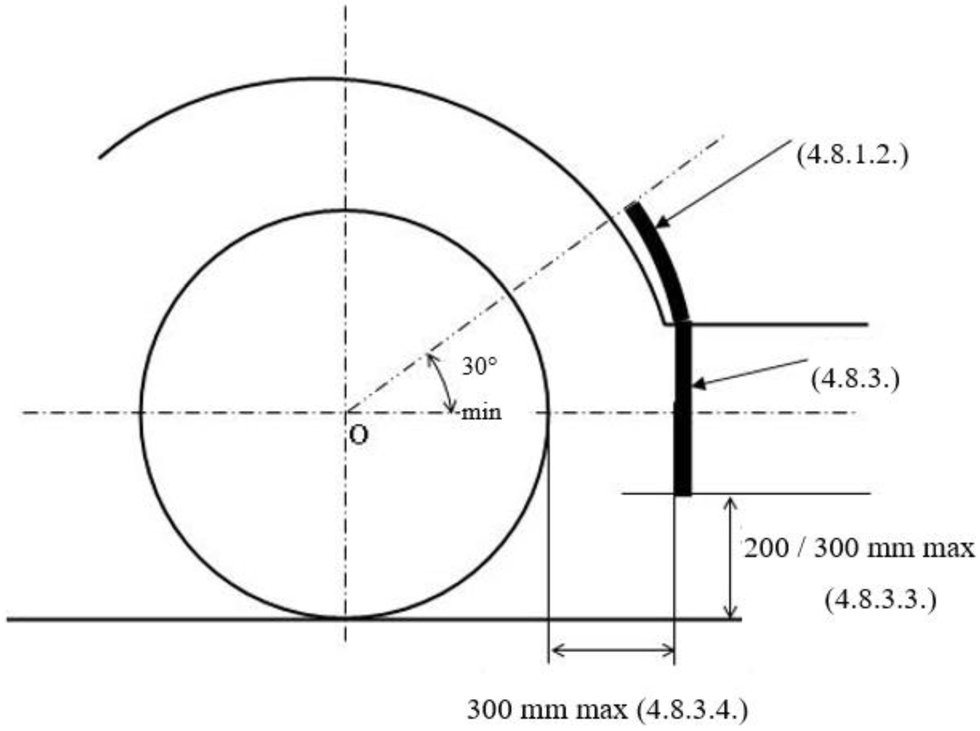
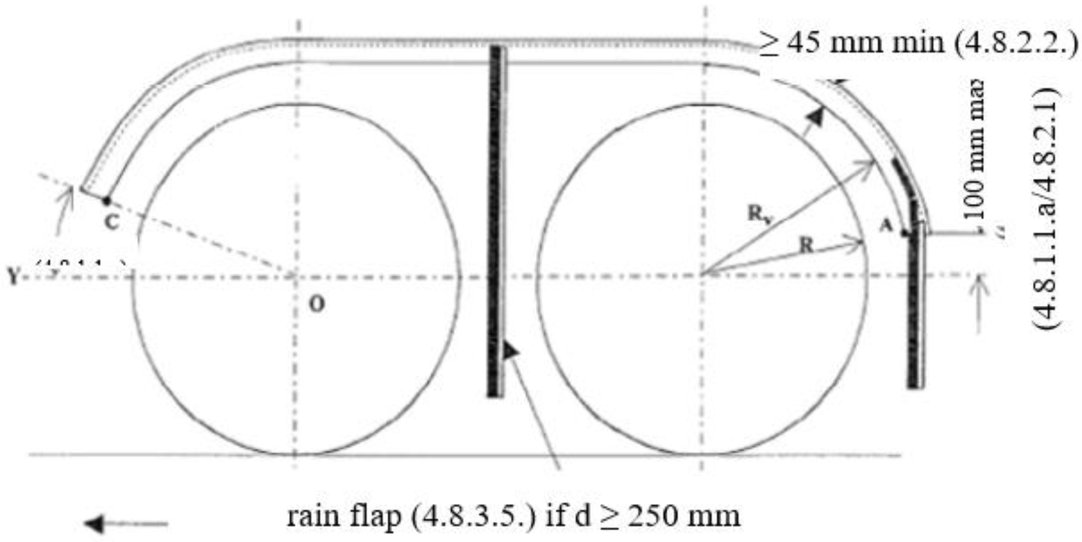
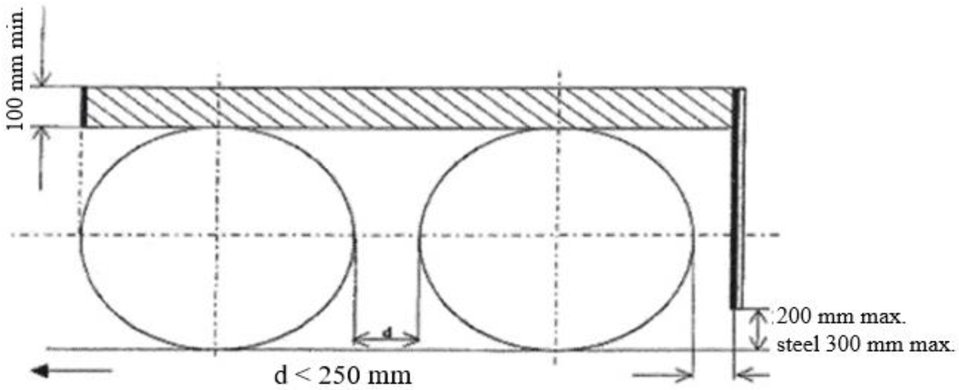
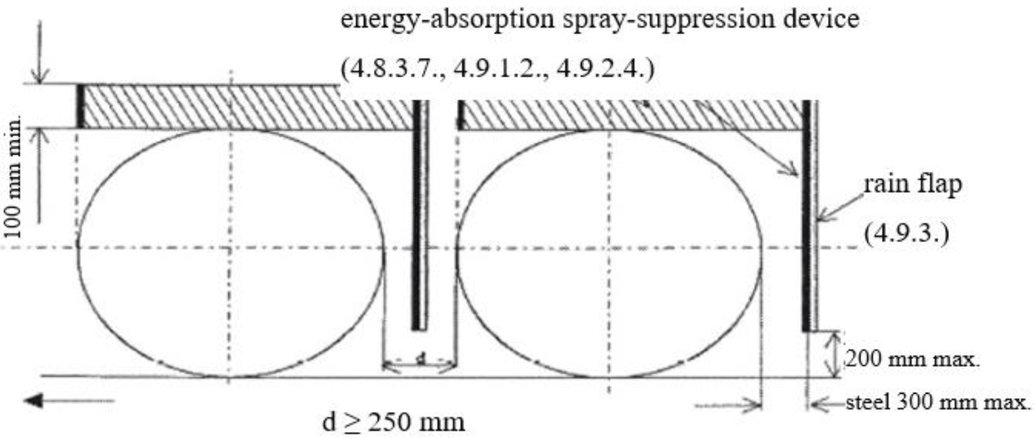
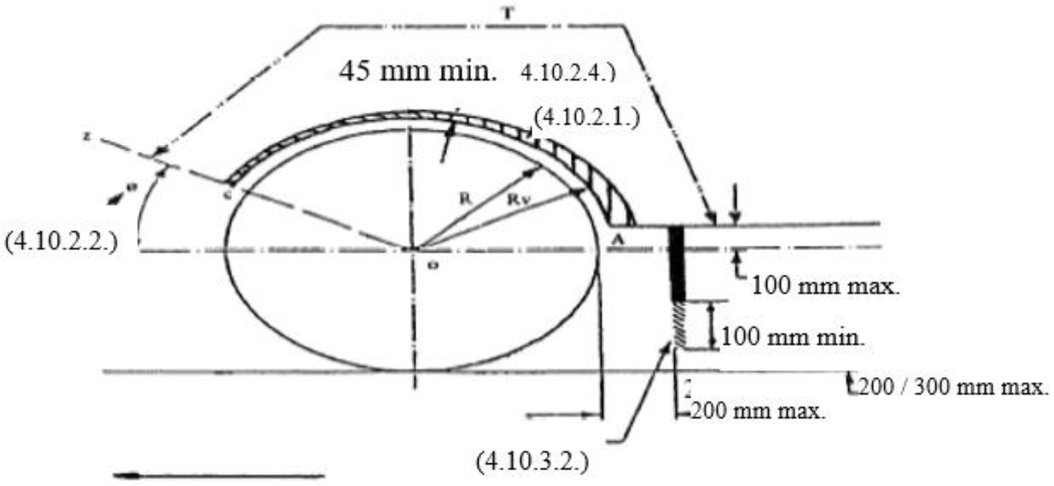
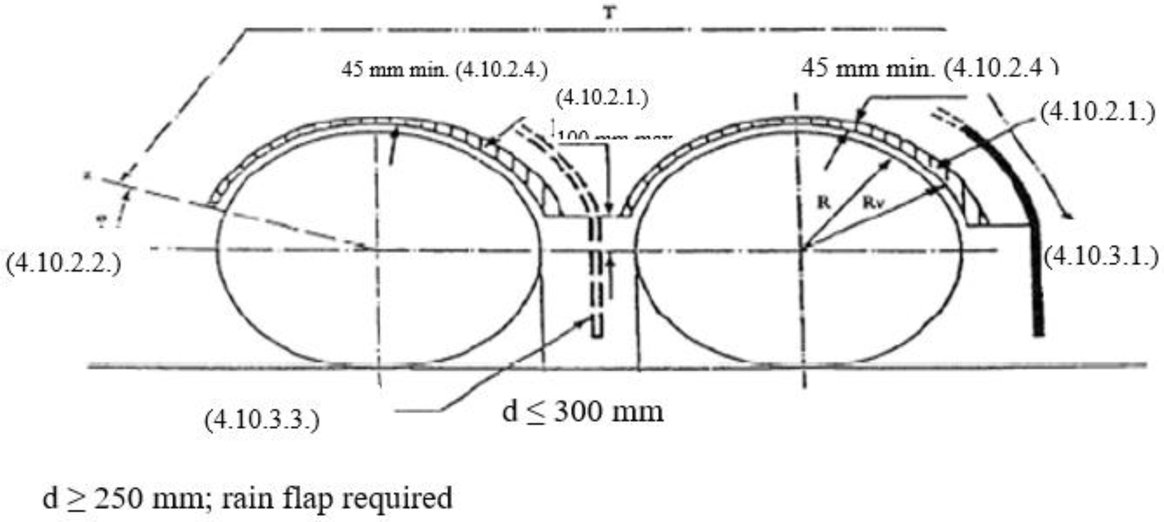
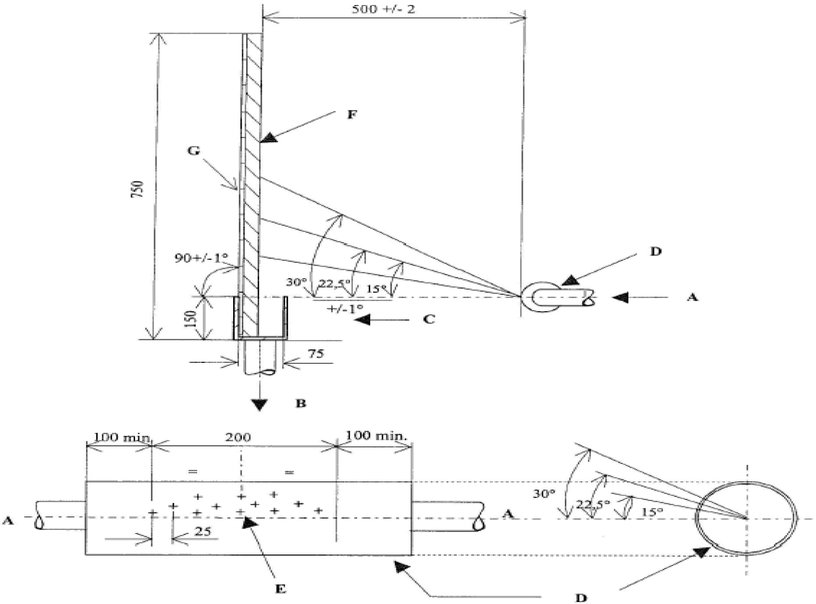
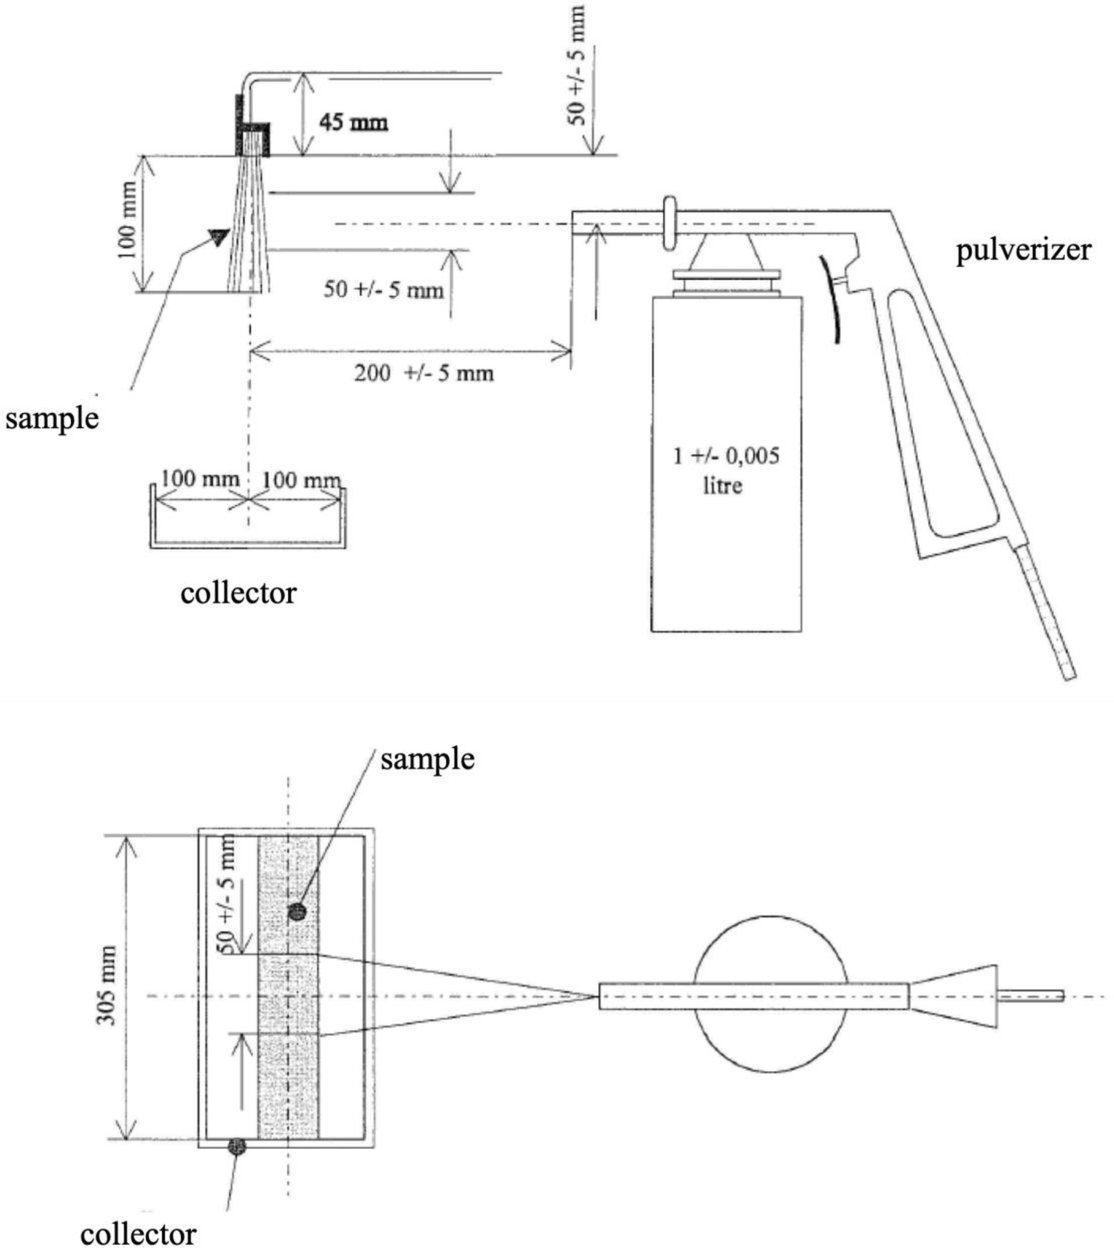
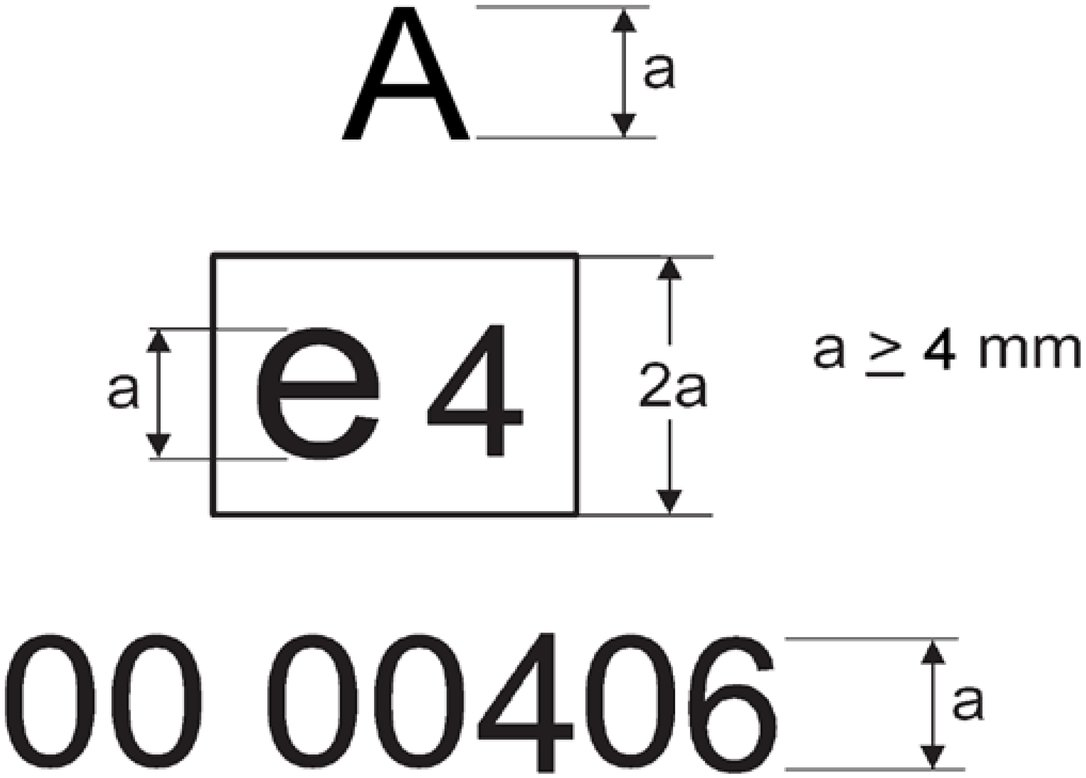
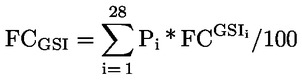
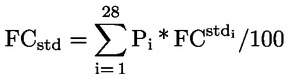
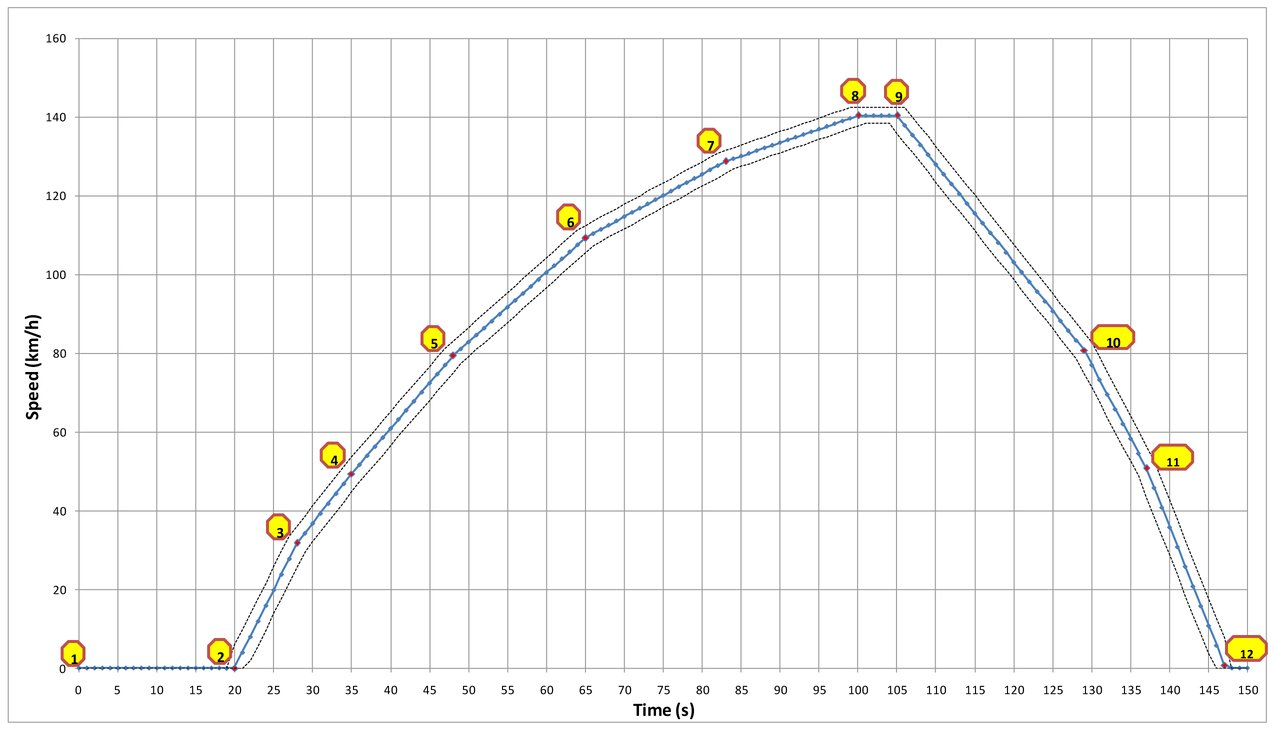
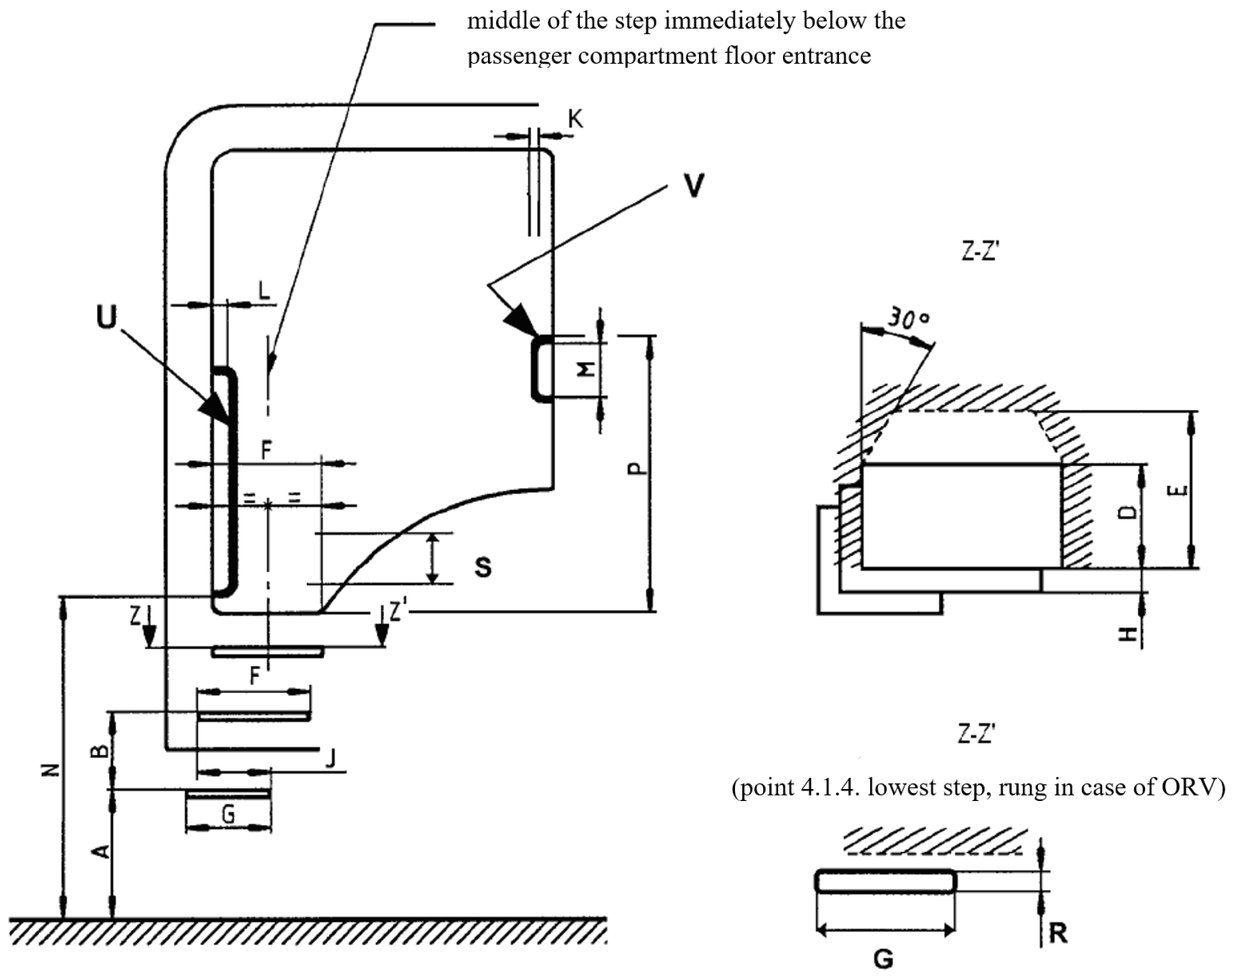
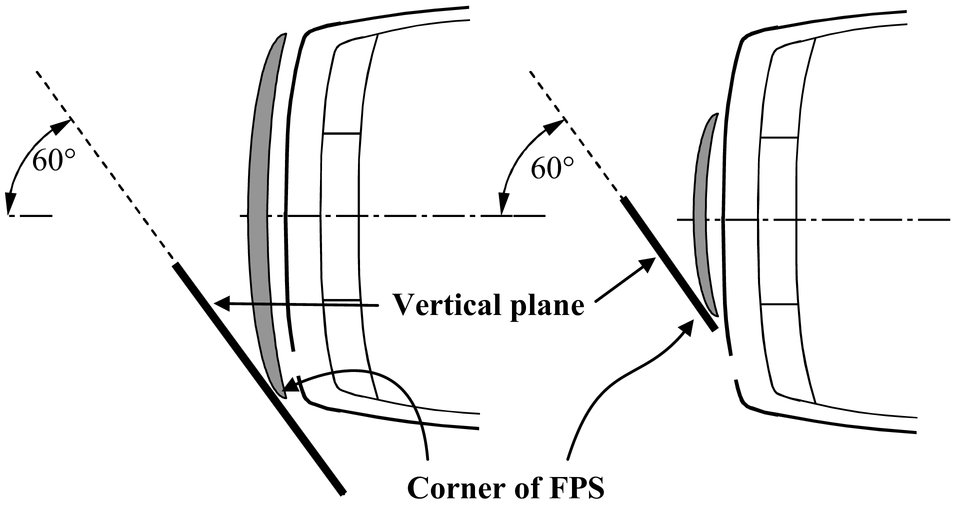
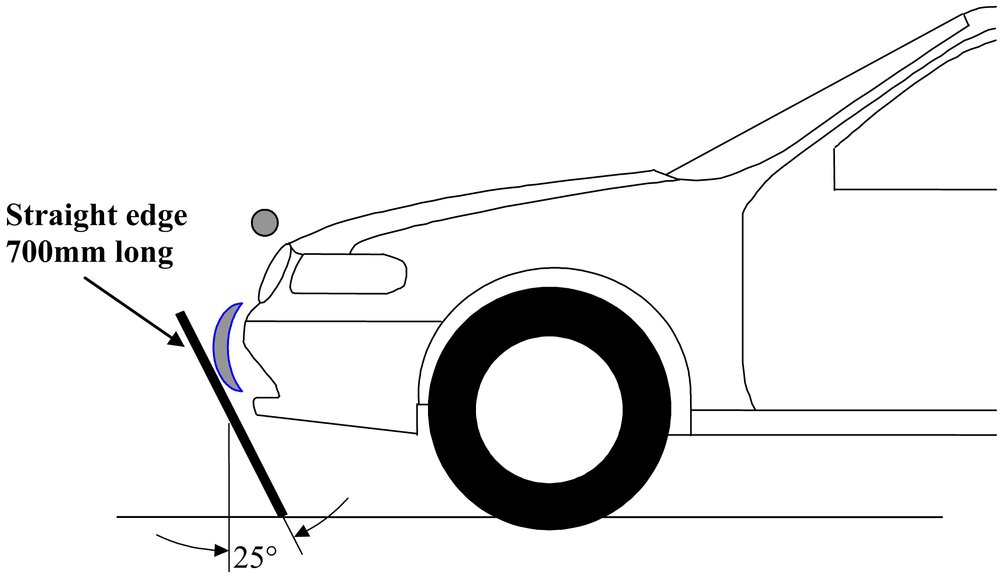
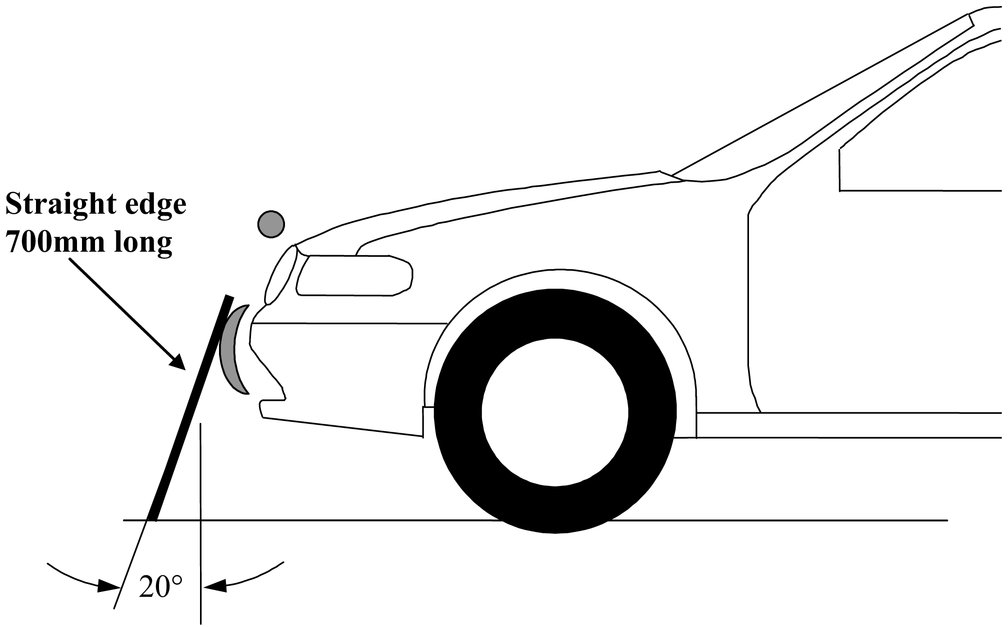
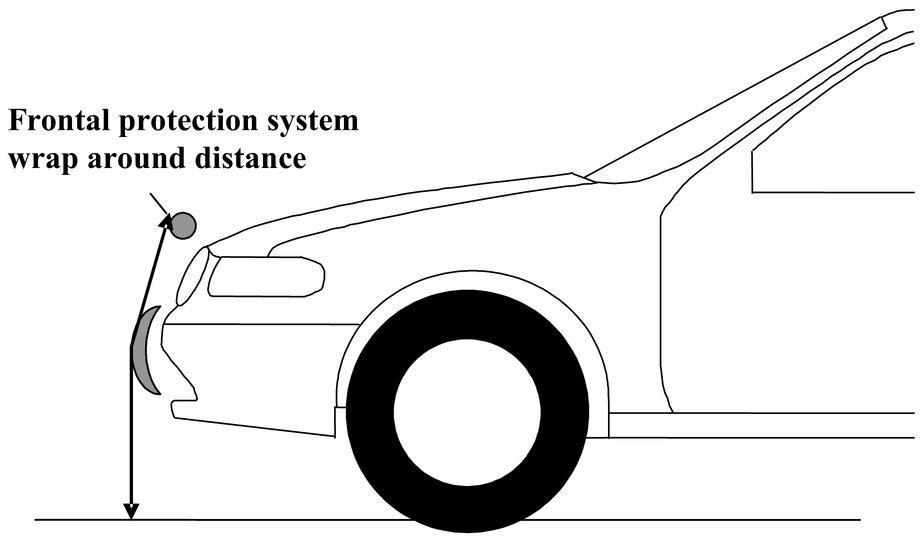
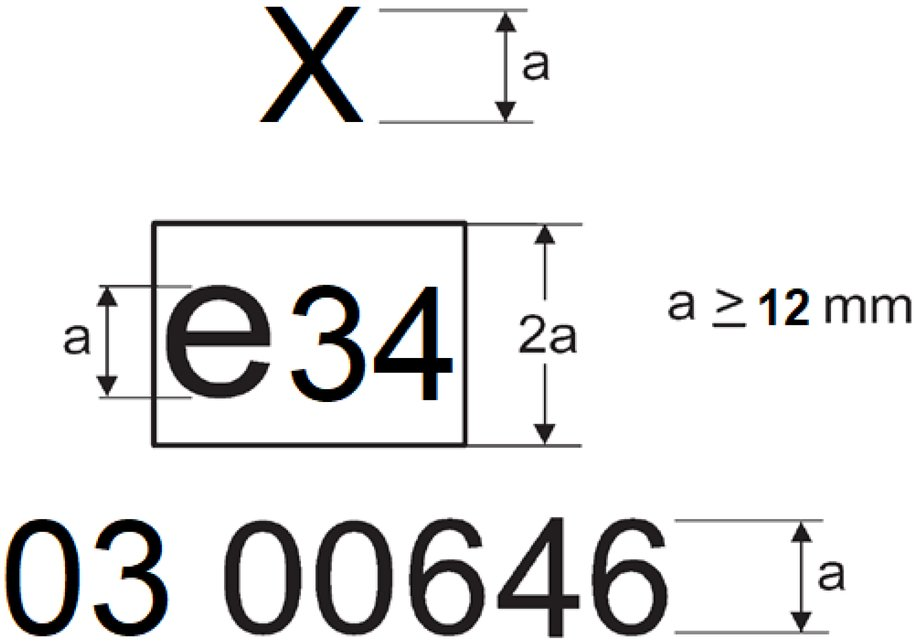
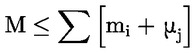
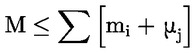
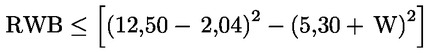
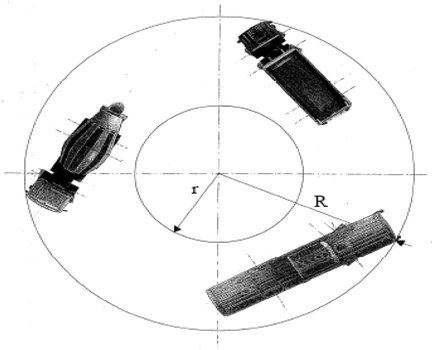
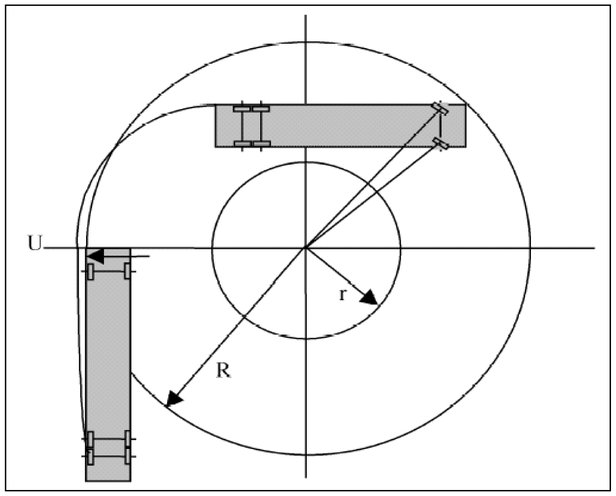
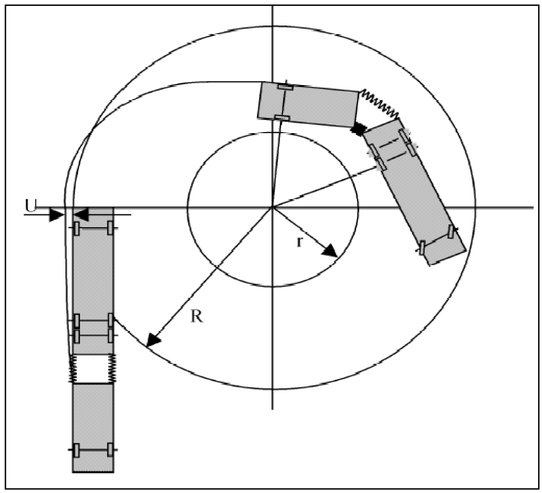
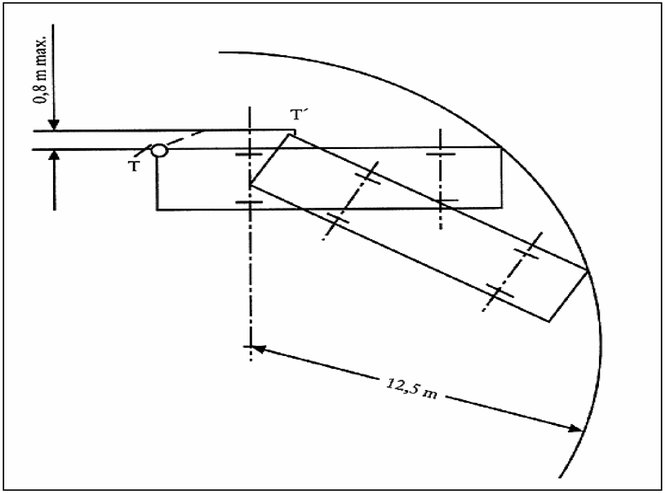
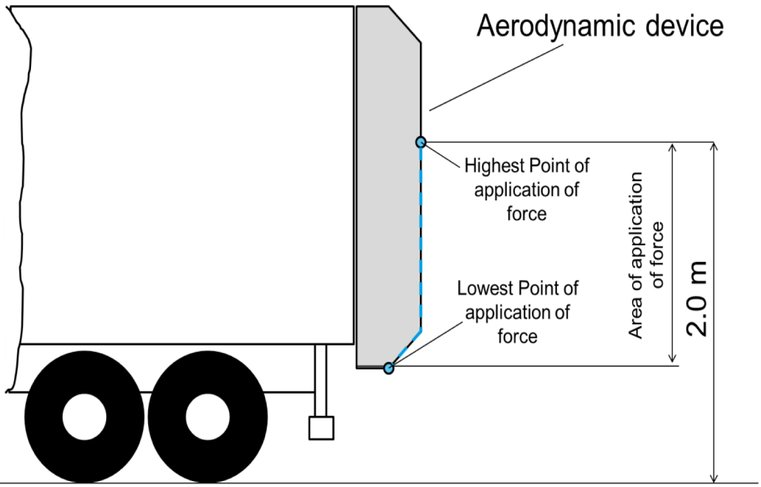
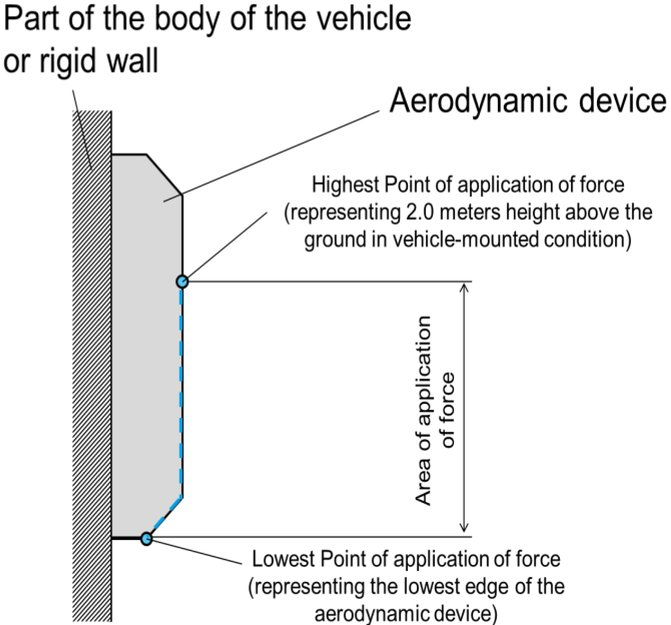
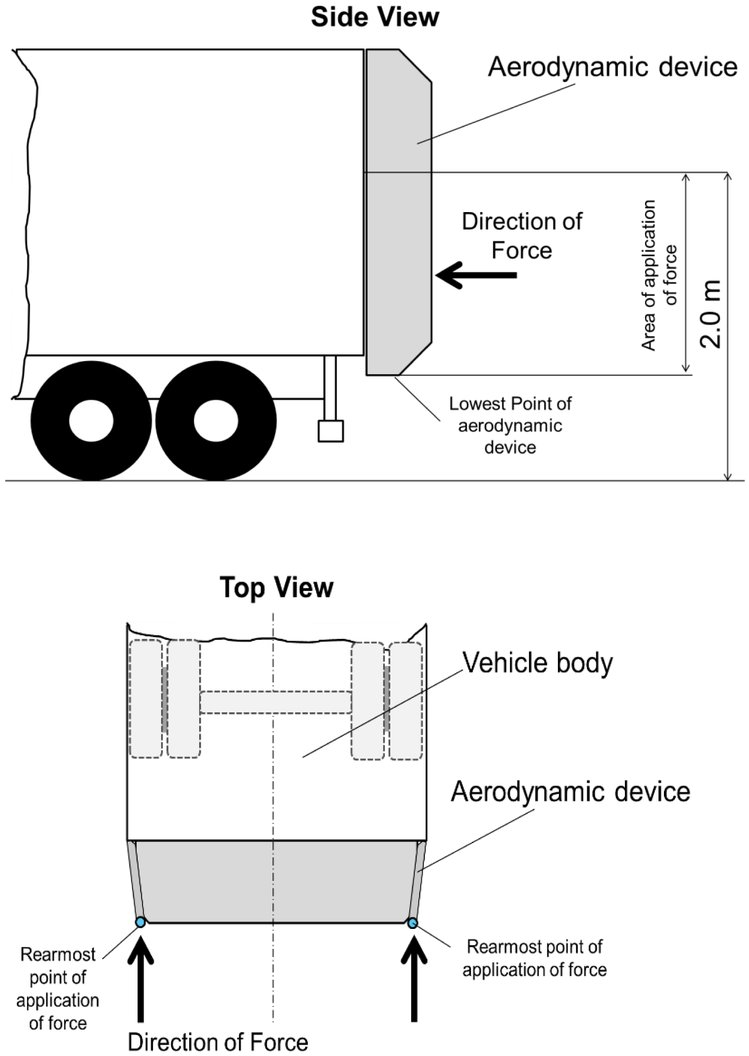
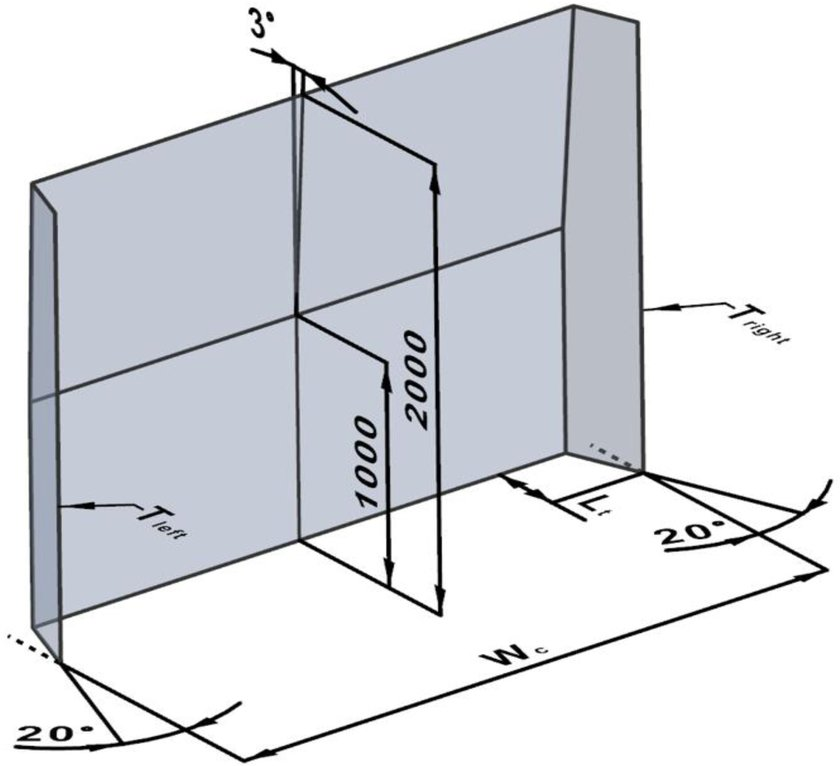
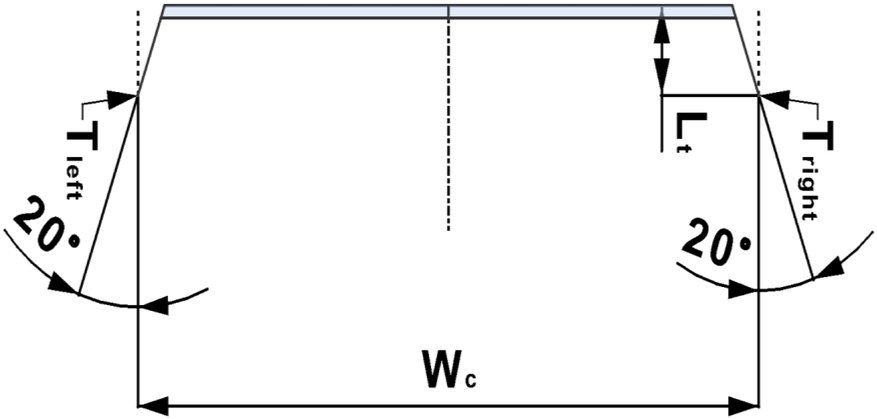
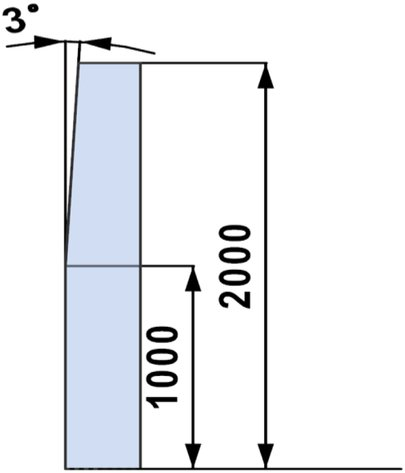
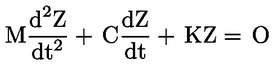
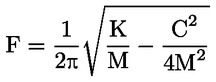
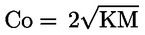
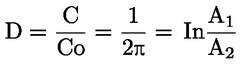
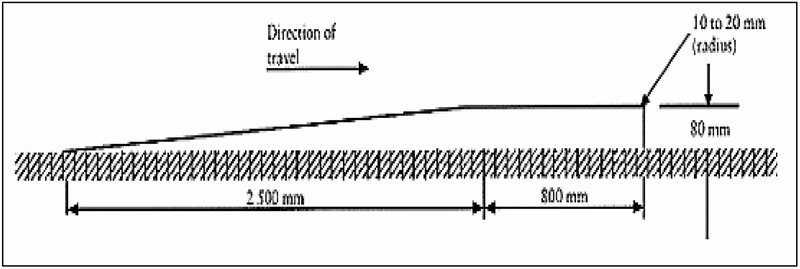
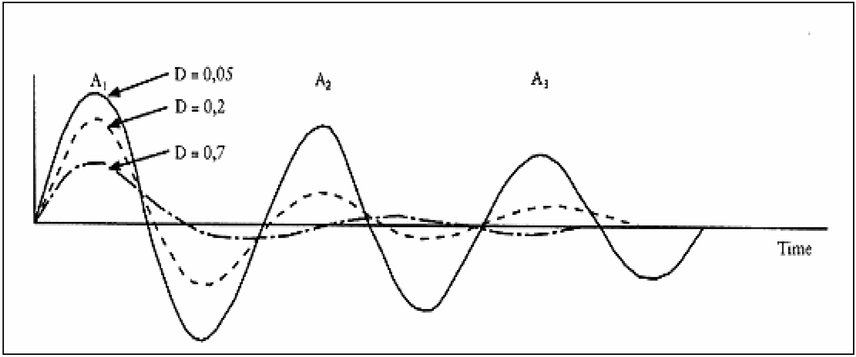
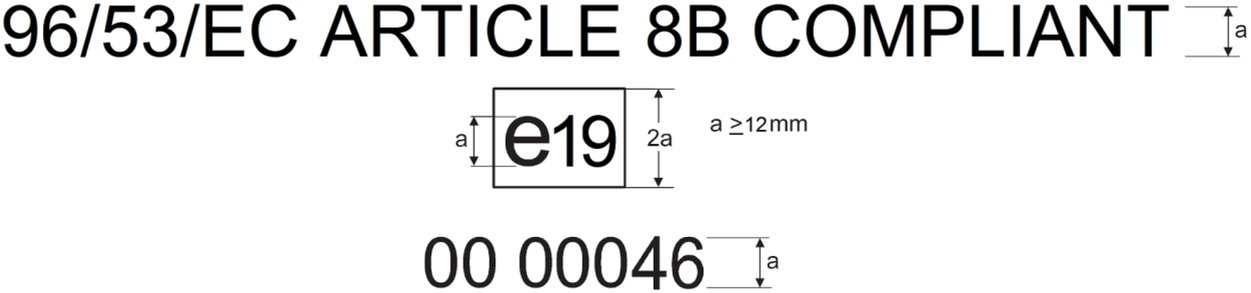
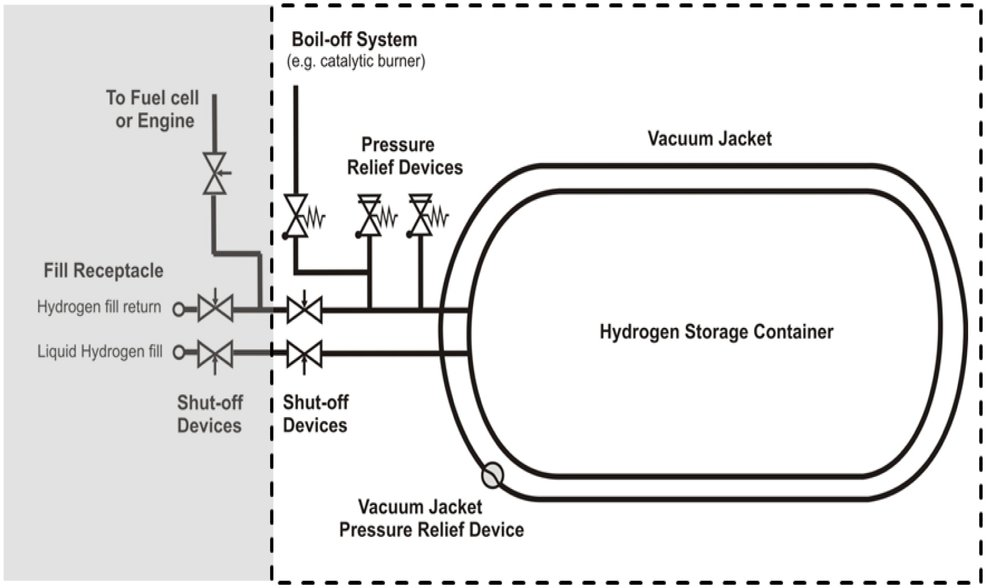
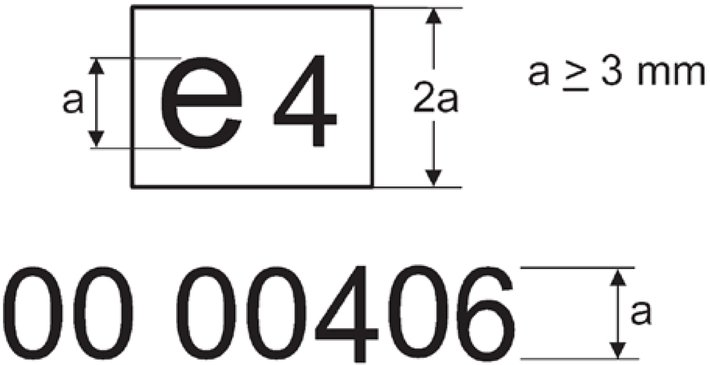

In [1]:
from helper.eurlex_loader import get_html_by_title 

res = get_html_by_title("2021/535")

print(res)